In [ ]:
# Import Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score



In [35]:
df = pd.read_csv(r"C:\Users\CHINMAYA\Downloads\NFLX.csv")

In [36]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [37]:
viz = df.copy()

In [38]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [39]:
df.shape

(1009, 7)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [42]:
train, test = train_test_split(df, test_size = 0.2)

In [43]:
test_pred = test.copy()

In [44]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
685,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900
400,2019-09-09,294.809998,301.549988,290.600006,294.339996,294.339996,8232700
582,2020-05-29,417.459991,420.299988,411.850006,419.730011,419.730011,5254900
617,2020-07-20,489.140015,504.500000,484.200012,502.410004,502.410004,11940300
956,2021-11-19,692.349976,694.159973,675.000000,678.799988,678.799988,2613700
872,2021-07-23,512.159973,517.409973,504.660004,515.409973,515.409973,3820500
848,2021-06-18,496.399994,504.489990,495.239990,500.769989,500.769989,5197600
962,2021-11-30,668.200012,675.380005,640.010010,641.900024,641.900024,5608900
446,2019-11-12,295.320007,295.350006,288.700012,292.010010,292.010010,5772800
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300


In [45]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
332,2019-06-03,343.559998,347.660004,332.649994,336.630005,336.630005,7849600
274,2019-03-11,352.000000,358.980011,350.029999,358.859985,358.859985,5387300
102,2018-07-02,385.450012,398.380005,380.000000,398.179993,398.179993,8142500
948,2021-11-09,653.700012,660.500000,650.520020,655.989990,655.989990,2415600
622,2020-07-27,484.510010,496.920013,482.309998,495.649994,495.649994,7863100
318,2019-05-13,352.290009,354.260010,343.100006,345.260010,345.260010,8026700
662,2020-09-22,489.010010,491.820007,479.260010,491.170013,491.170013,3482300
401,2019-09-10,291.160004,297.170013,282.660004,287.989990,287.989990,12320200
611,2020-07-10,519.729980,555.880005,511.279999,548.729980,548.729980,21605600
46,2018-04-12,309.720001,311.130005,306.750000,309.250000,309.250000,10249400


In [46]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [47]:
y_train = train['Close'].values
y_test = test['Close'].values

In [48]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred = model_lnr.predict(x_test)

In [50]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.52898582]


In [51]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 18.979
RMSE 4.357
MAE 3.071
MAPE 0.008
R2 Score :  0.998


In [52]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [53]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [54]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


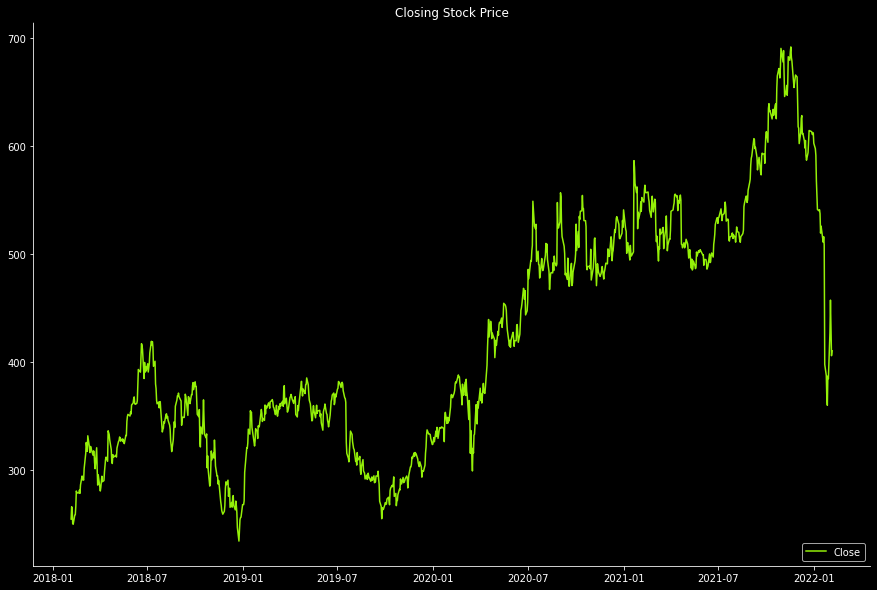

In [55]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

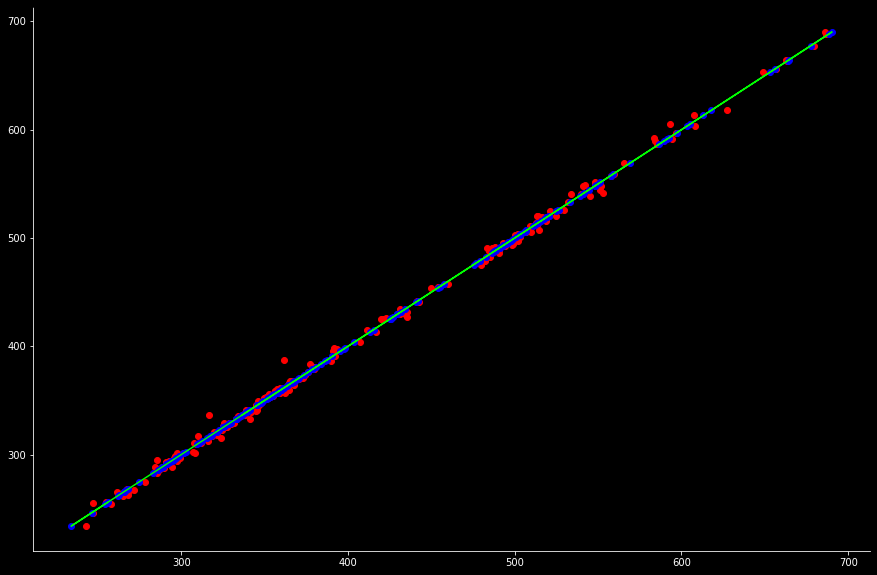

In [56]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [57]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
332,2019-06-03,343.559998,347.660004,332.649994,336.630005,336.630005,7849600,338.327292
274,2019-03-11,352.000000,358.980011,350.029999,358.859985,358.859985,5387300,356.229151
102,2018-07-02,385.450012,398.380005,380.000000,398.179993,398.179993,8142500,391.628178
948,2021-11-09,653.700012,660.500000,650.520020,655.989990,655.989990,2415600,656.589421
622,2020-07-27,484.510010,496.920013,482.309998,495.649994,495.649994,7863100,492.909997
...,...,...,...,...,...,...,...,...
250,2019-02-04,342.600006,352.000000,341.299988,351.339996,351.339996,9051400,349.461945
252,2019-02-06,357.000000,357.040009,347.190002,352.190002,352.190002,6717700,349.423127
119,2018-07-26,358.190002,365.540009,356.630005,363.089996,363.089996,6993700,363.124368
773,2021-03-03,545.929993,548.010010,517.809998,520.700012,520.700012,5362400,524.845885


In [58]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,413.583316,107.834204,233.880005,330.362504,372.115005,502.839989,690.309998
Close_Prediction,202.0,413.360228,107.604098,242.565173,330.417910,371.547049,502.016627,686.932087
